In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\fb\car_evaluation.csv")

In [94]:
df

,Buying,Maintenance,Doors,Persons,lugboot,safety,cars
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [95]:
lugboot_new = {"small":1 , "med":2 , "big":3}
safe_new = {"low":1 , "med":2 , "high":3}
car_new = {"unacc":1 , "acc":2 , "good":3 , "vgood":4}
person_new = {"2":2 , "4":4 , "more":5}
door_new = {"2": 2 ,"3":3,"4":4 ,"5more":5}
main_new = {"vhigh":4 , "high":3 ,"med":2 , "low":1}
buying_new = {"vhigh":4 , "high":3 ,"med":2 , "low":1}


In [96]:
df["Doors"] = df["Doors"].map(door_new)
df["cars"] = df["cars"].map(car_new)
df["lugboot"] =df["lugboot"].map(lugboot_new)
df["Maintenance"] = df["Maintenance"].map(main_new)
df["Persons"] = df["Persons"].map(person_new)
df["safety"] =df["safety"].map(safe_new)
df["Buying"] = df["Buying"].map(buying_new)

In [97]:
df

,Buying,Maintenance,Doors,Persons,lugboot,safety,cars
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,3
1724,1,1,5,5,2,3,4
1725,1,1,5,5,3,1,1
1726,1,1,5,5,3,2,3


In [98]:
df.corr()

,Buying,Maintenance,Doors,Persons,lugboot,safety,cars
Buying,1.000000e+00,-2.072211e-15,4.242286e-15,7.983938e-16,-1.525866e-16,-1.554300e-15,-0.282750
Maintenance,-2.072211e-15,1.000000e+00,7.975102e-16,1.883561e-16,-1.216188e-16,-2.588623e-16,-0.232422
Doors,4.242286e-15,7.975102e-16,1.000000e+00,-9.989138e-17,6.080942e-17,9.909683e-17,0.066057
Persons,7.983938e-16,1.883561e-16,-9.989138e-17,1.000000e+00,1.514191e-18,1.362772e-17,0.373459
lugboot,-1.525866e-16,-1.216188e-16,6.080942e-17,1.514191e-18,1.000000e+00,7.131641e-18,0.157932
safety,-1.554300e-15,-2.588623e-16,9.909683e-17,1.362772e-17,7.131641e-18,1.000000e+00,0.439337
cars,-2.827504e-01,-2.324215e-01,6.605665e-02,3.734592e-01,1.579317e-01,4.393373e-01,1.000000


In [99]:
X=df.drop(["cars"] , axis =1)
y = df["cars"]

In [100]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import precision_score , recall_score ,classification_report , f1_score , accuracy_score , confusion_matrix , plot_roc_curve

In [101]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2)

In [102]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [103]:
classifier.score(X_test,y_test)

0.9335260115606936

## Hyperparameter tuning using Grid Search cv

In [104]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.703 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.848 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.704 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.986 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.989 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.971 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.989 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.949 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.968 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [105]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [106]:
best_grid=grid.best_estimator_

In [107]:
best_grid.score(X_test, y_test)

0.9797687861271677

In [108]:
grid_predictions = best_grid.predict(X_test)

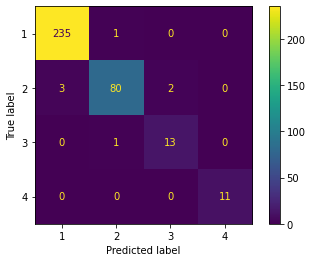

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=grid_predictions);

In [110]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       236
           2       0.98      0.94      0.96        85
           3       0.87      0.93      0.90        14
           4       1.00      1.00      1.00        11

    accuracy                           0.98       346
   macro avg       0.96      0.97      0.96       346
weighted avg       0.98      0.98      0.98       346



In [111]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(best_grid,X,y,cv=skfold)
print(np.mean(scores))

0.9252856566742841
